# 3.2 Introduction

# 3.3 Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from scipy import signal

pd.set_option("display.precision", 8)

# 3.4 Load The Data

## 3.4.1 load features

In [2]:
train_features_df = pd.read_csv('../data/train_transform.csv', index_col = 0)
train_features_df.head().T

segid,0,1,2,3,4
ttf_avg,1.45006776,1.41123080,1.37191772,1.33282983,1.29412711
rol50_mean,4.88396930,4.72572934,4.90607225,4.90205921,4.90895786
rol50_std,4.01174281,4.37924774,4.84921926,4.47583862,4.70072652
rol50_kurt,-0.15699139,-0.16173637,-0.18125376,-0.17382694,-0.16932632
rol50_skew,0.00455048,0.00077470,0.00933095,0.00860799,0.01217176
rol500_mean,4.88370257,4.72503565,4.90602213,4.90151805,4.90969481
rol500_std,4.18226969,4.65342136,5.17879226,4.74354823,4.95048537
rol500_kurt,0.26529479,0.32351749,0.44292754,0.34331676,0.31681020
rol500_skew,0.01266011,0.00347586,0.01036933,0.01800397,0.01293928
rol5000_mean,4.87833586,4.71976571,4.90324427,4.89816318,4.90975792


In [3]:
train_features_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4179 entries, 0 to 4178
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ttf_avg           4179 non-null   float64
 1   rol50_mean        4179 non-null   float64
 2   rol50_std         4179 non-null   float64
 3   rol50_kurt        4179 non-null   float64
 4   rol50_skew        4179 non-null   float64
 5   rol500_mean       4179 non-null   float64
 6   rol500_std        4179 non-null   float64
 7   rol500_kurt       4179 non-null   float64
 8   rol500_skew       4179 non-null   float64
 9   rol5000_mean      4179 non-null   float64
 10  rol5000_std       4179 non-null   float64
 11  rol5000_kurt      4179 non-null   float64
 12  rol5000_skew      4179 non-null   float64
 13  rol50_mean_std    4179 non-null   float64
 14  rol50_std_std     4179 non-null   float64
 15  rol50_kurt_std    4179 non-null   float64
 16  rol50_skew_std    4179 non-null   float64


# 3.5 Explore The Data

## 3.5.1 Scatterplots of features against target

In [4]:
# define useful function to create scatterplots of time_to_failure against desired columns
def scatterplots(df, columns, ncol=None, figsize=(15, 20)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = df.columns[0],  data=df, alpha=0.5)
        ax.set(xlabel=col, ylabel= df.columns[0])
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

In [5]:
features_df = train_features_df.columns[1:]



### 3.5.1.1 Scatter plot of rolling features versus target

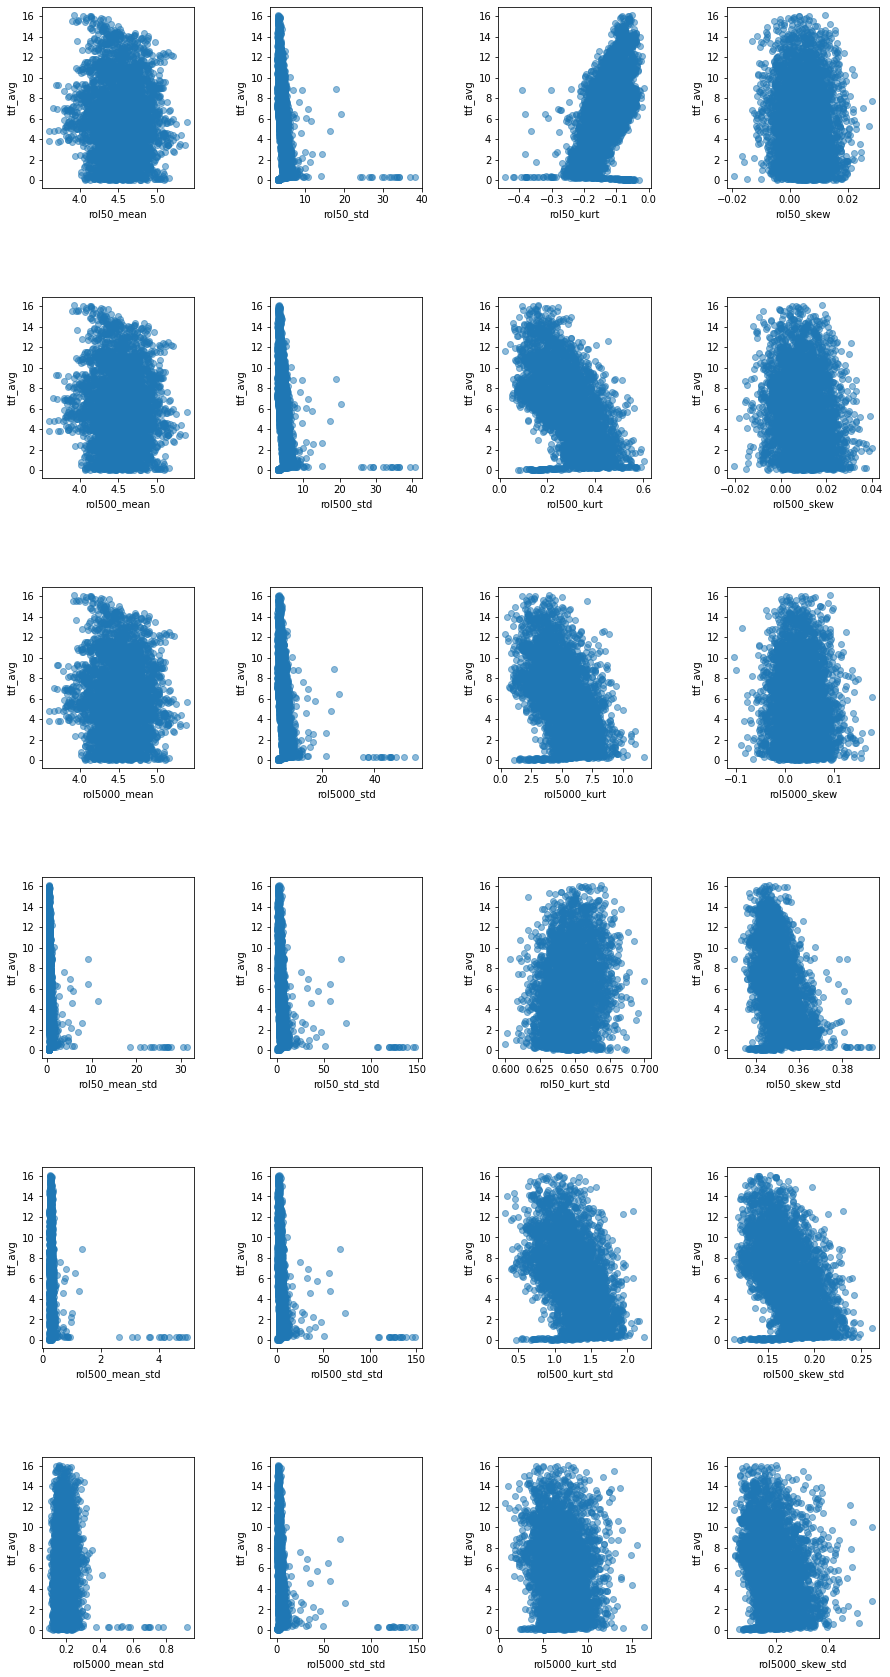

In [6]:
scatterplots(train_features_df, features_df, ncol=4, figsize=(15, 30))

### 3.5.1.2 Frequencyt domain features 